In [2]:
import pandas as pd
import numpy as np
import re
import locale as lc

In [3]:
lc.setlocale(lc.LC_ALL,'en_US.UTF8')
lc.getdefaultlocale()
lc.getlocale()

('en_US', 'UTF-8')

In [4]:
apps = pd.read_excel("Google_Play_Store_Raw.xlsx")
#tpf.shift(1,axis=1)
#tpf.shift(1,axis=1)

In [5]:
rows, column = apps.shape
print("Document contains {} rows and {} columns before data cleaning".format(rows, column))

Document contains 10841 rows and 15 columns before data cleaning


In [6]:
apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [7]:
apps.drop(['Unnamed: 13','Unnamed: 14'],axis=1,inplace=True)

In [8]:
rows, column = apps.shape
print("Document contains {} rows and {} columns after data cleaning".format(rows, column))

Document contains 10841 rows and 13 columns after data cleaning


In [9]:
tpf = apps[apps.Size=='1,000+'] #10472
print(tpf)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [10]:
new_rating= apps[apps.Size=='1,000+']['Category']
print(new_rating.values[0])
new_review= apps[apps.Size=='1,000+']['Rating']
print(new_review.values[0])
app_name = apps[apps.Size=='1,000+']['App']
print(app_name.values[0])
new_size= apps[apps.Size=='1,000+']['Reviews']
print(new_size.values[0])
new_installs= apps[apps.Size=='1,000+']['Size']
print(new_installs.values[0])
new_Type= apps[apps.Size=='1,000+']['Installs']
print(new_Type.values[0])
new_price= apps[apps.Size=='1,000+']['Type']
print(new_price.values[0])
new_CR= apps[apps.Size=='1,000+']['Price']
print(new_CR.values[0])
new_Genres = apps[apps.Size=='1,000+']['Content Rating']
print(new_Genres.values[0])
new_LU = apps[apps.Size=='1,000+']['Genres']
print(new_LU.values[0])
new_CV = apps[apps.Size=='1,000+']['Last Updated']
print(new_CV.values[0])
new_AV = apps[apps.Size=='1,000+']['Current Ver']
print(new_AV.values[0])

1.9
19.0
Life Made WI-Fi Touchscreen Photo Frame
3.0M
1,000+
Free
0
Everyone
nan
February 11, 2018
1.0.19
4.0 and up


In [11]:
#tpf = apps[apps.Size=='1,000+'].shift(periods=1,axis=1)
#apps.update(tpf,join='left',overwrite=True)

In [12]:
apps.loc[10472,'Rating'] = new_rating.values[0]
apps.loc[10472,'Category']= np.NaN
apps.loc[10472,'Reviews']= (new_review.values[0])
apps.loc[10472,'Size']= (new_size.values[0])
apps.loc[10472,'Installs'] = (new_installs.values[0])
apps.loc[10472,'Type']  = (new_Type.values[0])
apps.loc[10472,'Price']  = (new_price.values[0])
apps.loc[10472,'Content Rating']  =(new_CR.values[0])
apps.loc[10472,'Genres'] = (new_Genres.values[0])
apps.loc[10472,'Last Updated'] = (new_LU.values[0])
apps.loc[10472,'Current Ver'] = (new_CV.values[0])
apps.loc[10472,'Android Ver'] = (new_AV.values[0])

In [13]:
apps.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [14]:
apps.select_dtypes(include = np.number).columns.tolist()

['Rating']

In [15]:
#Considering Apps with Rating 4.0 and plus are performing well
len(apps['App'][apps['Rating']>=4.0])

7368

In [16]:
#Considering Apps with Rating 2.0 and less are performing bad
len(apps['App'][apps['Rating']<=2.0])

69

In [17]:
#Converting Installs from string to int
new_val =[]
for val in apps['Installs']:
    lst = (re.findall('([0-9,]+)\+{0,1}$',str(val))) #1000+ and 0
    if len(lst)> 0:
        val = lst[0]
        new_val.append(lc.atoi(val))
    else:
        print("values",len(lst),val)
        new_val.append(np.NaN) #Free
apps['Installs'] = new_val

In [18]:
apps['Installs'][0]

10000

In [19]:
#Converting size from string to int
new_size =[]
fault_data = []
for val in apps['Size']:
    lst = (re.findall('([0-9]+)([a-zA-z]{1}$)',str(val))) #{'M', 'k'}
    if len(lst)>0:
        if(lst[0][1] == 'k'):
            val = int(lst[0][0])
            val = val/1000
        else:
            val = int(lst[0][0])
        new_size.append(val)
    else:
        fault_data.append(val) # {'Varies with device', '1,000+'}
        #print("fault data", val)
        #replacing text and ambigous data with NaN
        new_size.append(np.NaN)
apps['Size'] = new_size

In [20]:
round(np.average(apps['Size'].dropna()),2)

21.35

In [21]:
round(np.average(apps['Installs'].dropna()),2)

15462912.51

In [22]:
type_Free = apps[apps.Type=='Free']
len(type_Free)

10040

In [23]:
type_Paid =  apps[apps.Type=='Paid']
len(type_Paid)

800

In [24]:
apps[apps.Type.isnull()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [25]:
round(len(type_Paid)/len(type_Free),2)

0.08

In [26]:
#converting price from str to int
new_price =[]
fault_data = []
for val in apps['Price']:
    lst = (re.findall('([0-9]+)(\${0,1}$)',str(val))) #{'M', 'k'}
    if len(lst)>0:
            val = int(lst[0][0])
            new_price.append(val)
    else:
        fault_data.append(val) # {'Varies with device', '1,000+'}
        #print("fault data", val)
        #replacing text and ambigous data with NaN
        new_price.append(np.NaN)
apps['Price'] = new_price


In [27]:
import matplotlib.pyplot as plt

In [28]:
app_number = []
category = []
for group , frame in apps.groupby('Category'):
    category.append(group)
    app_number.append(len(frame))
#print(category,app_number)
app_dict = {'Category' : category,'App_Number' : app_number }
app_df = pd.DataFrame(app_dict)

In [29]:
app_df_sorted = app_df.sort_values(by=['App_Number'], ascending=False)
app_df_sorted.head(1)

,Category,App_Number
11,FAMILY,1972


In [30]:
type(app_df['Category'])

pandas.core.series.Series

Text(0,0.5,'Total Installs')

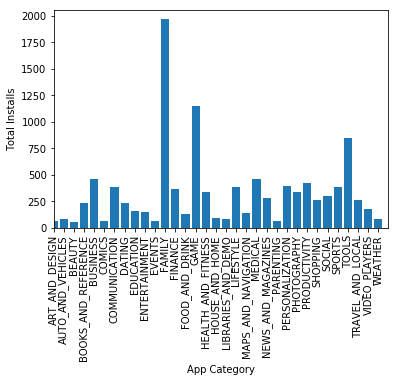

In [31]:
# plt.hist(category,app_number)A
plt.bar(app_df['Category'],app_df['App_Number'])
ax = plt.gca()
x = ax.xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
ax.axis([0,33,0,2050])
ax.set_xlabel('App Category')
ax.set_ylabel('Total Installs')

In [32]:
plt.pio

0

AttributeError: module 'matplotlib.pyplot' has no attribute 'pio'

In [33]:
topFive = list(app_df_sorted[:5]['App_Number'])
type(topFive)

list

In [34]:
rest = list(app_df_sorted[6:]['App_Number'])
rest_total = sum(rest)
rest_total

5534

In [35]:
topFive.append(rest_total)
print(topFive)

[1972, 1144, 843, 463, 460, 5534]


In [36]:
category_desc = list(app_df_sorted[:5]['Category'])
category_desc.append('Others')

In [37]:
category_desc

['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'Others']

Text(0.5,1,'Top 5 Categories among 33 App Categories')

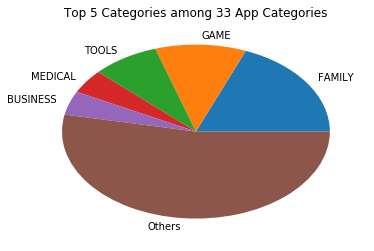

In [38]:
plt.pie(topFive,labels=category_desc)
axPie=plt.gca()
axPie.set_title('Top 5 Categories among 33 App Categories')

In [39]:
top_15 = app_df_sorted[:15]['Category']

In [40]:
top_15_Category = list(top_15)


In [53]:
avg_rating = []
category_rating = []
avg_app_size = []
avg_app_prize = []
for group , frame in apps.groupby('Category'):
    if group in top_15_Category:
        category_rating.append(group)
        avg_rating.append(np.mean((frame['Rating'])))
        avg_app_size.append(np.mean((frame['Size'])))
        avg_app_prize.append(np.mean((frame['Price'])))
#print(category,app_number)
app_mean_rating = {'Category' : category_rating,'Average_Rating':avg_rating, 'Average_Size':avg_app_size,'Average_Price':avg_app_prize}
app_mean_rating_df = pd.DataFrame(app_mean_rating)
app_mean_rating_df.sort_values(by=['Average_Rating'],ascending=False,inplace=True)
app_mean_rating_df

,Category,Average_Rating,Average_Size,Average_Price
9,PERSONALIZATION,4.335987,11.231389,17.336735
4,GAME,4.286326,44.320640,6.844406
5,HEALTH_AND_FITNESS,4.277104,22.341182,4.498534
12,SOCIAL,4.255598,17.565681,1.006780
13,SPORTS,4.223511,24.075669,5.208333
11,PRODUCTIVITY,4.211396,12.629931,5.643868
2,FAMILY,4.192272,28.214392,8.812373
10,PHOTOGRAPHY,4.192114,17.129870,5.734328
7,MEDICAL,4.189143,19.587104,20.941685
1,COMMUNICATION,4.158537,11.704442,5.979328


Text(0.5,1,'Average Rating of top 15 Categories')

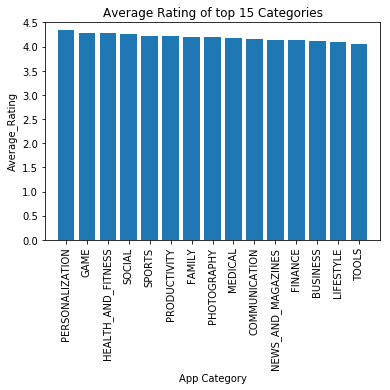

In [42]:
plt.bar(app_mean_rating_df['Category'],app_mean_rating_df['Average_Rating'])
ax = plt.gca()
x = ax.xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
ax.axis([-1,15,0,4.5])
ax.set_xlabel('App Category')
ax.set_ylabel('Average_Rating')
ax.set_title('Average Rating of top 15 Categories')

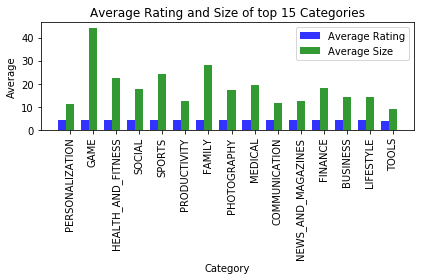

In [52]:
fig, ax2 = plt.subplots()
index = np.arange(15)
bar_width =0.35
opacity=0.8
ratings = plt.bar(index,app_mean_rating_df['Average_Rating'], bar_width,
alpha=opacity,
color='b',
label='Average Rating')

size = plt.bar(index + bar_width,app_mean_rating_df['Average_Size'], bar_width,
alpha=opacity,
color='g',
label='Average Size')

plt.xlabel('Category')
plt.ylabel('Average')
plt.title('Average Rating and Size of top 15 Categories')
plt.xticks(index + bar_width, app_mean_rating_df['Category'], rotation =90)
plt.legend()
 
plt.tight_layout()
plt.show()


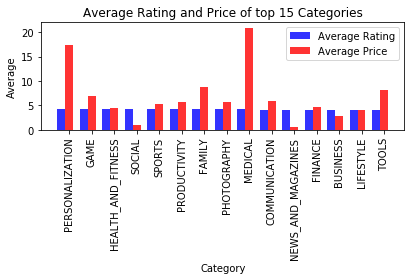

In [56]:
fig, ax2 = plt.subplots()
index = np.arange(15)
bar_width =0.35
opacity=0.8
ratings = plt.bar(index,app_mean_rating_df['Average_Rating'], bar_width,
alpha=opacity,
color='b',
label='Average Rating')

size = plt.bar(index + bar_width,app_mean_rating_df['Average_Price'], bar_width,
alpha=opacity,
color='r',
label='Average Price')

plt.xlabel('Category')
plt.ylabel('Average')
plt.title('Average Rating and Price of top 15 Categories')
plt.xticks(index + bar_width, app_mean_rating_df['Category'], rotation =90)
plt.legend()
 
plt.tight_layout()
plt.show()

In [67]:
category = []
paid_to_free = []
for group , frame in apps.groupby('Category'):
    if group in category_desc:
        category.append(group)
        free_app = len(frame[frame['Type']=='Free'])
        paid_app = len(frame[frame['Type']=='Paid'])
        paid_to_free.append(paid_app/free_app)
paid_to_free_dict = {'Category' : category,'Paid to Free Ratio':paid_to_free}
paid_to_free_df = pd.DataFrame(paid_to_free_dict)
paid_to_free_df
#app_mean_rating_df.sort_values(by=['Average_Rating'],ascending=False,inplace=True)
#app_mean_rating_df

['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'Others']


,Category,Paid to Free Ratio
0,BUSINESS,0.031390
1,FAMILY,0.107303
2,GAME,0.078228
3,MEDICAL,0.307910
4,TOOLS,0.101961


Text(0.5,1,'Paid to Free Ratio of top 5 Categories')

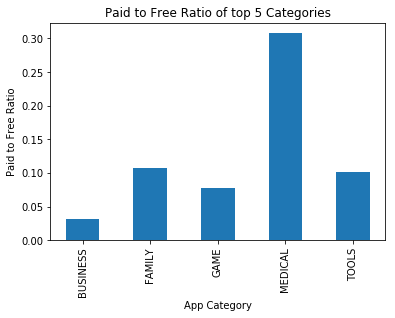

In [70]:
plt.bar(paid_to_free_df['Category'],paid_to_free_df['Paid to Free Ratio'],width =0.5)
ax = plt.gca()
x = ax.xaxis
for item in x.get_ticklabels():
    item.set_rotation(90)
ax.set_xlabel('App Category')
ax.set_ylabel('Paid to Free Ratio')
ax.set_title('Paid to Free Ratio of top 5 Categories')

In [72]:
app_type = []
total_installs = []
for group , frame in apps.groupby('Type'):
        app_type.append(group)
        sum_installs = sum(frame[frame['Type']== group]['Installs'])
        total_installs.append(sum_installs)
print(app_type)
print(total_installs)

['Free', 'Paid']
[167560478406, 72956081]


Text(0.5,1,'Free VS Paid Apps')

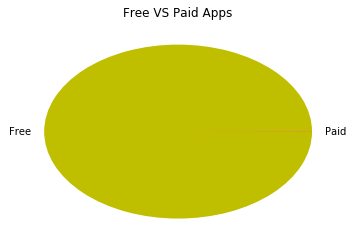

In [77]:
plt.pie(total_installs,labels=app_type,colors=['y','r'])
axPie=plt.gca()
axPie.set_title('Free VS Paid Apps')

In [74]:
plt.pie?